In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapfunction as mapf
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wh_popden = pd.read_csv('wh_popden_final.csv')

# <span style="color:red">Observation 1: </span>  

# <span style="color:red">Observation 2: </span>

#### Question: What is the min, max and range of Happiness Scores?

In [4]:
print('Min Happiness Score:',round(wh_popden['Happiness Score'].min(), 3))
print('Min Happiness Country:')
print(wh_popden[['Country', 'Region']].loc[wh_popden['Happiness Score'] == wh_popden['Happiness Score'].min()])
print('Max Happiness Score:',round(wh_popden['Happiness Score'].max(), 3))
print('Max Happiness Country:')
print(wh_popden[['Country', 'Region']].loc[wh_popden['Happiness Score'] == wh_popden['Happiness Score'].max()])
print('Happiness Score range:', round((wh_popden['Happiness Score'].max()- wh_popden['Happiness Score'].min()),3))

Min Happiness Score: 2.693
Min Happiness Country:
                     Country              Region
26  Central African Republic  Sub-Saharan Africa
Max Happiness Score: 7.537
Max Happiness Country:
    Country          Region
101  Norway  Western Europe
Happiness Score range: 4.844


Text(0.5, 1.0, 'Bottom 10 Happiness Scores')

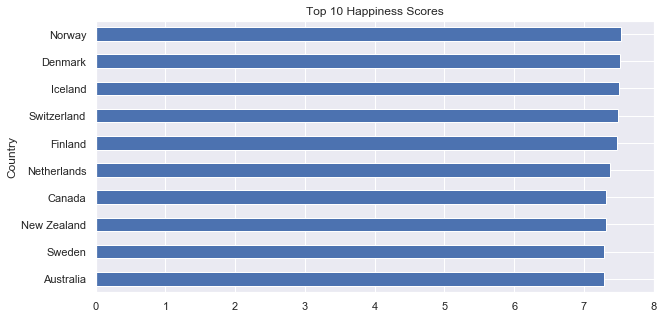

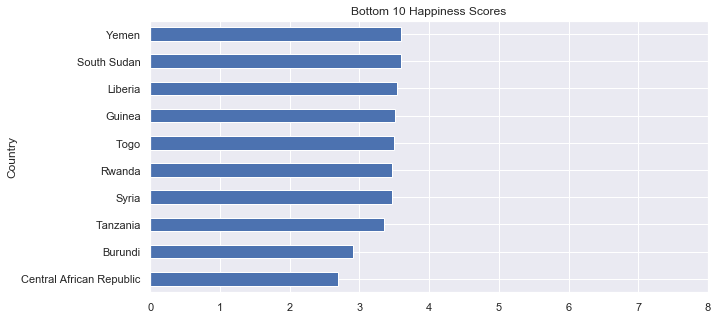

In [5]:
ax = wh_popden[['Country','Happiness Score']].sort_values('Happiness Score').tail(10).plot(kind='barh',x='Country',y='Happiness Score',xlim=(0,8), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Top 10 Happiness Scores')

ax = wh_popden[['Country','Happiness Score']].sort_values('Happiness Score').head(10).plot(kind='barh',x='Country',y='Happiness Score',xlim=(0,8), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Bottom 10 Happiness Scores')

#### Question: What is the min, max and range of Population Density Scores?

In [6]:
print('Min Population Density Score:',round(wh_popden['Population Density'].min(), 3))
print('Min Population Density Country:')
print(wh_popden[['Country', 'Region']].loc[wh_popden['Population Density'] == wh_popden['Population Density'].min()])
print('Max Population Density Score:',round(wh_popden['Population Density'].max(), 3))
print('Max Population Density Country:')
print(wh_popden[['Country', 'Region']].loc[wh_popden['Population Density'] == wh_popden['Population Density'].max()])
print('Population Density Score range:', round((wh_popden['Population Density'].max()- wh_popden['Population Density'].min()),3))

Min Population Density Score: 2.0
Min Population Density Country:
     Country        Region
89  Mongolia  Eastern Asia
Max Population Density Score: 8155.5
Max Population Density Country:
       Country             Region
118  Singapore  Southeastern Asia
Population Density Score range: 8153.5


Text(0.5, 1.0, 'Bottom 10 Population Density Scores')

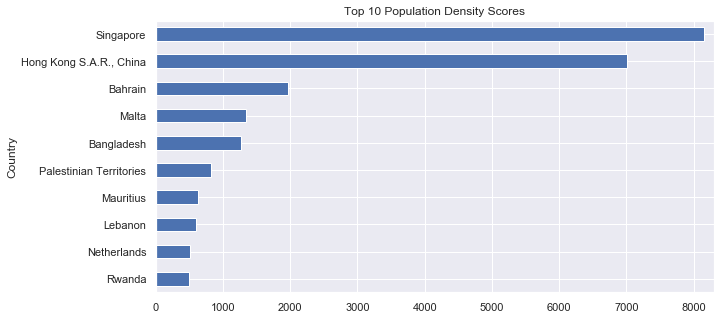

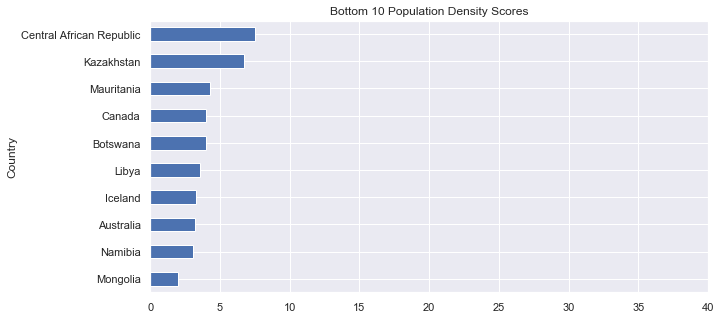

In [7]:
ax = wh_popden[['Country','Population Density']].sort_values('Population Density').tail(10).plot(kind='barh',x='Country',y='Population Density',xlim=(0,8300), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Top 10 Population Density Scores')

ax = wh_popden[['Country','Population Density']].sort_values('Population Density').head(10).plot(kind='barh',x='Country',y='Population Density',xlim=(0,40), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Bottom 10 Population Density Scores')

# <span style="color:red">Observation: </span>

### Question: What's the distribution of each category

In [8]:
hist_happiness = wh_popden[['Happiness Score']]
hist_popden = wh_popden[['Population Density']]

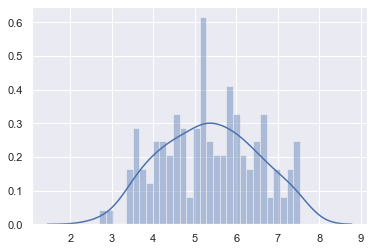

In [9]:
sns.distplot(hist_happiness, bins=30)

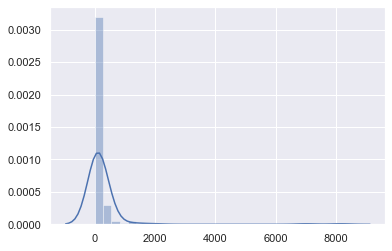

In [10]:
sns.distplot(hist_popden, bins=30)

# <span style="color:red">Observation 1: </span>

# <span style="color:red">Observation 2:</span>

# <span style="color:red">Observation 3: </span>

#### Question: What are the average scores by region?

In [20]:
def score_by_region(score):
    print(wh_popden[['Region',score]].groupby('Region').mean().sort_values(score, ascending=False))

def graph_by_region(score):
    wh_popden[['Region',score]].groupby('Region').mean().sort_values(score).plot(kind='barh', title=score)
    plt.legend().remove()

                                 Happiness Score
Region                                          
Australia and New Zealand               7.299000
North America                           7.154500
Western Europe                          6.748400
Latin America and Caribbean             5.957818
Eastern Asia                            5.491600
Southeastern Asia                       5.444875
Central and Eastern Europe              5.414607
Middle East and Northern Africa         5.369684
Southern Asia                           4.628429
Sub-Saharan Africa                      4.110158


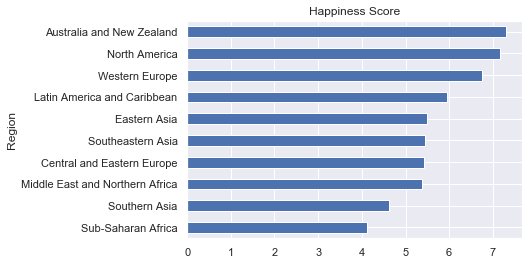

In [21]:
score_by_region('Happiness Score')
graph_by_region('Happiness Score')

                                 Population Density
Region                                             
Eastern Asia                            1545.540000
Southeastern Asia                       1170.625000
Southern Asia                            369.128571
Middle East and Northern Africa          269.778947
Western Europe                           214.450000
Latin America and Caribbean              103.372727
Sub-Saharan Africa                        96.813158
Central and Eastern Europe                73.146429
North America                             19.750000
Australia and New Zealand                 10.550000


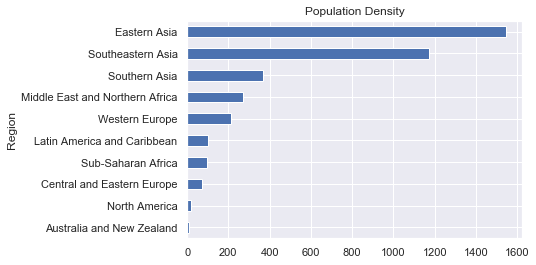

In [15]:
score_by_region('Population Density')
graph_by_region('Population Density')

In [16]:
world_2017 = gpd.read_file('world2017/wh_popden.shp')

In [17]:
mapf.show_map(world_2017,
        'happiness',
        '2017 World Happiness',
        'World Happiness',
        1,
        world_2017.happiness.min(),
        world_2017.happiness.max())

Loading BokehJS ...

In [19]:
mapf.show_map(world_2017,
        'pop_den',
        '2017 Population Density',
        'Population Density',
        -1,
        world_2017.pop_den.min(),
        world_2017.pop_den.max())

Loading BokehJS ...